In [431]:
import pandas as pd
import numpy as np


In [432]:
with open("Klaus_Teuber(1).json", encoding="utf-8") as file:
    text = file.read()
    klaus_teuber_data = json.loads(text)

In [433]:
klaus_teuber_data["backlinks"][len(klaus_teuber_data["backlinks"])-1]
filtered = [e for e in klaus_teuber_data["backlinks"]if type(e["views"]) == list]
filtered2 = [e for e in filtered if len(e["views"]) == 93]

In [434]:
sum = np.array(len(filtered2[0]["views"]))
sum.fill(0)
for i in range(len(filtered2)):
    sum = sum + np.array([e["views"] for e in filtered2[i]["views"]])
sum

array([21904, 25205, 19161,  5746,  2617,  2289,  2029,  2232,  2270,
        2151,  2116,  2551,  2151,  2025,  1954,  3008,  5092,  3929,
        2283,  1938,  1991,  1844,  2176,  2278,  1940,  2266,  2302,
        2067,  2182,  2270,  2061,  2380,  2070,  2029,  2013,  2029,
        2421,  2153,  3188,  2765,  2201,  2013,  1960,  2151,  2105,
        2222,  2040,  2097,  1965,  1796,  2021,  2009,  2118,  2953,
        2547,  2187,  2031,  2314,  2156,  2057,  1963,  1853,  1751,
        1655,  1884,  1978,  1835,  1922,  2055,  1882,  1729,  1983,
        2081,  3859,  3255,  2131,  1868,  1859,  2116,  2150,  2061,
        1921,  1707,  1984,  1949,  2074,  1941,  1944,  1812,  2092,
        1811,  1763,  2049])

In [435]:
import matplotlib.pyplot as plt

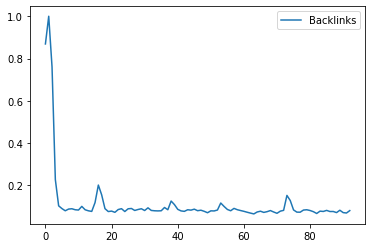

In [436]:
sum = sum/sum.max()
plt.plot(sum, label="Backlinks")
plt.legend()


In [437]:
base = klaus_teuber_data["baselink"]["views"]
base = np.array([e["views"] for e in base])
base #= base / base.max()

array([567, 437, 294, 113,  74,  52,  57,  76,  80,  67,  52,  55,  62,
        57,  77, 107, 225, 134,  71,  50,  60,  63, 114,  63,  68,  65,
        71,  67,  80,  99,  92,  69,  98,  67,  68,  95,  80,  73,  97,
        72,  67,  77,  98,  78,  59,  53,  82,  40,  55,  66, 103,  63,
        57,  95, 183,  61,  60,  74,  70,  66,  54,  51,  52,  64,  57,
        46,  35,  38,  32,  50,  52,  53,  42,  67,  62,  46,  49,  85,
        55,  47,  54,  50,  35,  77,  80,  68,  49,  47,  69,  38,  41,
        83,  96])

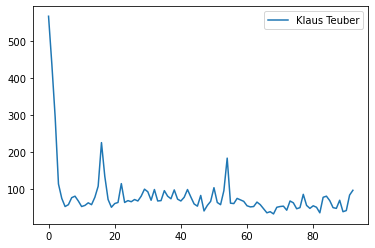

In [438]:
plt.plot(base, label="Klaus Teuber")
plt.legend()

In [439]:
filteredL = [e for e in klaus_teuber_data["links"]if type(e["views"]) == list]
filteredL = [e for e in filteredL if len(e["views"]) == 93]

base = base / base.max()

sum_link = np.array(len(filteredL[0]["views"]))
sum_link.fill(0)
for i in range(len(filteredL)):
    sum_link = sum_link + np.array([e["views"] for e in filteredL[i]["views"]])
#sum_link = np.array([e["views"] for e in filteredL])
sum_link = sum_link/ sum_link.max()

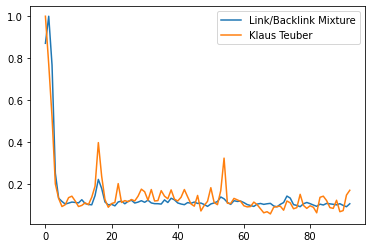

In [440]:
plt.plot((sum_link + sum)/2,label="Link/Backlink Mixture")
plt.plot(base,label="Klaus Teuber")
plt.legend()

In [467]:
from itertools import compress
top50 = list(compress(filtered2,[e["position"] < 50 for e in filtered2]))
sum_top50 = np.array(len(top50))
sum_top50.fill(0)
for i in range(len(top50)):
    sum_top50 = sum_top50 + np.array([e["views"] for e in top50[i]["views"]])
sum_top50 =  sum_top50/sum_top50.max()

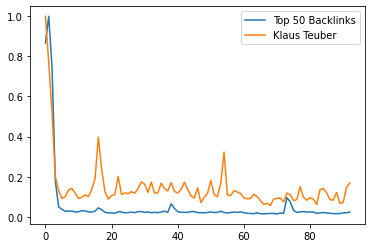

In [468]:
plt.plot(sum_top50, label="Top 50 Backlinks")
plt.plot(base, label="Klaus Teuber")
plt.legend()

In [443]:
link_top = filteredL[:50]
sum_top = np.zeros(len(link_top[0]["views"]))
print(link_top[0])
for i in range(len(link_top)):
    sum_top = sum_top + np.array([e["views"] for e in link_top[i]["views"]])
sum_top =  sum_top/sum_top.max()

{'name': 'Klaus Täuber', 'views': [{'date': '2023070100', 'views': 19895}, {'date': '2023070200', 'views': 23034}, {'date': '2023070300', 'views': 16997}, {'date': '2023070400', 'views': 3821}, {'date': '2023070500', 'views': 826}, {'date': '2023070600', 'views': 524}, {'date': '2023070700', 'views': 340}, {'date': '2023070800', 'views': 326}, {'date': '2023070900', 'views': 264}, {'date': '2023071000', 'views': 188}, {'date': '2023071100', 'views': 159}, {'date': '2023071200', 'views': 183}, {'date': '2023071300', 'views': 167}, {'date': '2023071400', 'views': 125}, {'date': '2023071500', 'views': 119}, {'date': '2023071600', 'views': 95}, {'date': '2023071700', 'views': 95}, {'date': '2023071800', 'views': 87}, {'date': '2023071900', 'views': 65}, {'date': '2023072000', 'views': 59}, {'date': '2023072100', 'views': 53}, {'date': '2023072200', 'views': 39}, {'date': '2023072300', 'views': 66}, {'date': '2023072400', 'views': 51}, {'date': '2023072500', 'views': 53}, {'date': '20230726

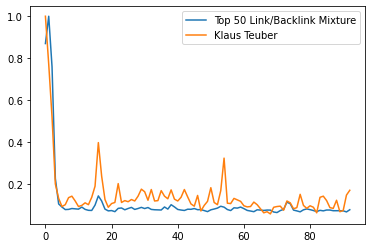

In [444]:
plt.plot((sum_top + sum_top50)/2, label="Top 50 Link/Backlink Mixture")
plt.plot(base,label= "Klaus Teuber")
plt.legend()

Normalize Test
Was passiert wenn man erst normalisiert?

In [445]:
link_top = filteredL[:50]
sum_top2 = np.zeros(len(link_top[0]["views"]))
print(link_top[0])
for i in range(len(link_top)):
    temp_array = np.array([e["views"] for e in link_top[i]["views"]])
    temp_array = temp_array / temp_array.max()
    sum_top2 = sum_top2 + temp_array
sum_top2 = sum_top2 / sum_top2.max()


{'name': 'Klaus Täuber', 'views': [{'date': '2023070100', 'views': 19895}, {'date': '2023070200', 'views': 23034}, {'date': '2023070300', 'views': 16997}, {'date': '2023070400', 'views': 3821}, {'date': '2023070500', 'views': 826}, {'date': '2023070600', 'views': 524}, {'date': '2023070700', 'views': 340}, {'date': '2023070800', 'views': 326}, {'date': '2023070900', 'views': 264}, {'date': '2023071000', 'views': 188}, {'date': '2023071100', 'views': 159}, {'date': '2023071200', 'views': 183}, {'date': '2023071300', 'views': 167}, {'date': '2023071400', 'views': 125}, {'date': '2023071500', 'views': 119}, {'date': '2023071600', 'views': 95}, {'date': '2023071700', 'views': 95}, {'date': '2023071800', 'views': 87}, {'date': '2023071900', 'views': 65}, {'date': '2023072000', 'views': 59}, {'date': '2023072100', 'views': 53}, {'date': '2023072200', 'views': 39}, {'date': '2023072300', 'views': 66}, {'date': '2023072400', 'views': 51}, {'date': '2023072500', 'views': 53}, {'date': '20230726

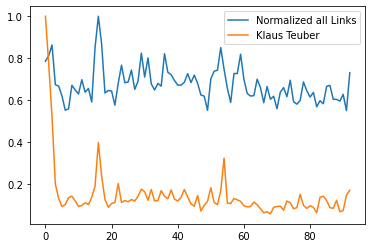

In [446]:
plt.plot(sum_top2,label="Normalized all Links")
plt.plot(base, label="Klaus Teuber")
plt.legend()

In [447]:
link_top = list(compress(filtered2,[e["position"] < 50 for e in filtered2]))
sum_topB = np.zeros(len(link_top[0]["views"]))
print(link_top[0])
for i in range(len(link_top)):
    temp_array = np.array([e["views"] for e in link_top[i]["views"]])
    temp_array = temp_array / temp_array.max()
    sum_topB = sum_topB + temp_array
sum_topB = sum_topB / sum_topB.max()

{'name': 'Die Siedler von Catan', 'position': 1, 'views': [{'date': '2023070100', 'views': 185}, {'date': '2023070200', 'views': 171}, {'date': '2023070300', 'views': 202}, {'date': '2023070400', 'views': 125}, {'date': '2023070500', 'views': 100}, {'date': '2023070600', 'views': 91}, {'date': '2023070700', 'views': 107}, {'date': '2023070800', 'views': 127}, {'date': '2023070900', 'views': 155}, {'date': '2023071000', 'views': 138}, {'date': '2023071100', 'views': 134}, {'date': '2023071200', 'views': 115}, {'date': '2023071300', 'views': 113}, {'date': '2023071400', 'views': 116}, {'date': '2023071500', 'views': 175}, {'date': '2023071600', 'views': 205}, {'date': '2023071700', 'views': 330}, {'date': '2023071800', 'views': 259}, {'date': '2023071900', 'views': 141}, {'date': '2023072000', 'views': 116}, {'date': '2023072100', 'views': 148}, {'date': '2023072200', 'views': 144}, {'date': '2023072300', 'views': 201}, {'date': '2023072400', 'views': 196}, {'date': '2023072500', 'views'

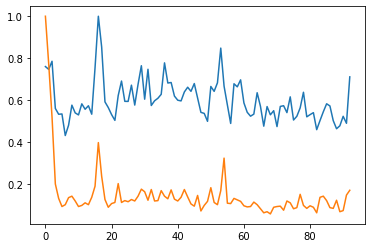

In [448]:
plt.plot((sum_topB +sum_top2) / 2,label="Mixture Backlinks/Links Normalized")
plt.plot(base,label="Klaus Teuber")

In [469]:
top1 = list(compress(filtered2,[e["position"] == 0 for e in filtered2]))
top1

[{'name': 'Drunter & Drüber',
  'position': 0,
  'views': [{'date': '2023070100', 'views': 17},
   {'date': '2023070200', 'views': 5},
   {'date': '2023070300', 'views': 11},
   {'date': '2023070400', 'views': 4},
   {'date': '2023070500', 'views': 3},
   {'date': '2023070600', 'views': 8},
   {'date': '2023070700', 'views': 5},
   {'date': '2023070800', 'views': 8},
   {'date': '2023070900', 'views': 6},
   {'date': '2023071000', 'views': 6},
   {'date': '2023071100', 'views': 5},
   {'date': '2023071200', 'views': 5},
   {'date': '2023071300', 'views': 3},
   {'date': '2023071400', 'views': 12},
   {'date': '2023071500', 'views': 6},
   {'date': '2023071600', 'views': 8},
   {'date': '2023071700', 'views': 34},
   {'date': '2023071800', 'views': 31},
   {'date': '2023071900', 'views': 8},
   {'date': '2023072000', 'views': 3},
   {'date': '2023072100', 'views': 9},
   {'date': '2023072200', 'views': 13},
   {'date': '2023072300', 'views': 12},
   {'date': '2023072400', 'views': 9},
 

In [473]:
[(e["name"],e["views"][0]) for e in top1]

[('Drunter & Drüber', {'date': '2023070100', 'views': 17}),
 ('Klaus Täuber', {'date': '2023070100', 'views': 19895}),
 ('Anno 1503 (Brettspiel)', {'date': '2023070100', 'views': 4}),
 ('Entdecker (Spiel)', {'date': '2023070100', 'views': 4}),
 ('Catan – Das Duell', {'date': '2023070100', 'views': 13}),
 ('CATAN – Seefahrer-Erweiterung', {'date': '2023070100', 'views': 7}),
 ('CATAN – Städte & Ritter', {'date': '2023070100', 'views': 14}),
 ('CATAN – Händler & Barbaren', {'date': '2023070100', 'views': 4})]